# Capstone Project (UK Data)

## 1. Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Extract desired Features
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area']]
print(df.shape)
df.head()

(285331, 11)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,6,3,6,3,4,1,1,1,0,0,1
1,6,3,3,6,2,1,1,1,0,0,1
2,6,3,3,6,2,1,1,1,0,0,1
3,1,3,6,0,-1,1,1,1,0,0,1
4,6,3,6,3,4,1,1,1,0,0,1


In [4]:
print(df.shape)
#Sort desired Features into something more understandable contd
df['journey_purpose_of_driver'] = df['journey_purpose_of_driver'].replace([6, 15], 5)
df['road_type'] = df['road_type'].replace([1, 7], 1)
df['road_type'] = df['road_type'].replace([2, 6, 12], 2)
df['junction_detail'] = df['junction_detail'].replace(2, 1)
df['junction_detail'] = df['junction_detail'].replace([3, 6, 7], 2)
df['junction_detail'] = df['junction_detail'].replace(5, 3)
df['junction_detail'] = df['junction_detail'].replace(8, 4)
df['junction_control'] = df['junction_control'].replace(4, 3)
df['light_conditions'] = df['light_conditions'].replace(4, 2)
df['light_conditions'] = df['light_conditions'].replace([5, 6], 3)
df['light_conditions'] = df['light_conditions'].replace(7, 4)
# sort weather column into two columns: one describing weather, and one specifically describing if there is any wind
df['high_wind'] = df['weather_conditions']
df['weather_conditions'] = df['weather_conditions'].replace(4, 1)
df['weather_conditions'] = df['weather_conditions'].replace(5, 2)
df['weather_conditions'] = df['weather_conditions'].replace(6, 3)
df['weather_conditions'] = df['weather_conditions'].replace(7, 4)
df['high_wind'] = df['high_wind'].replace([4, 5, 6], 1)
df['high_wind'] = df['high_wind'].replace([2, 3, 7], 2)
print(df.shape)
df.head()

(285331, 11)
(285331, 12)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,high_wind
0,5,3,2,2,3,1,1,1,0,0,1,1
1,5,3,3,2,2,1,1,1,0,0,1,1
2,5,3,3,2,2,1,1,1,0,0,1,1
3,1,3,2,0,-1,1,1,1,0,0,1,1
4,5,3,2,2,3,1,1,1,0,0,1,1


In [5]:
#drop all rows with NaN values
df.dropna(axis=0, how='any', inplace=True)
print(df.shape)

(285331, 12)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#import data visualization libraries
import seaborn as sns

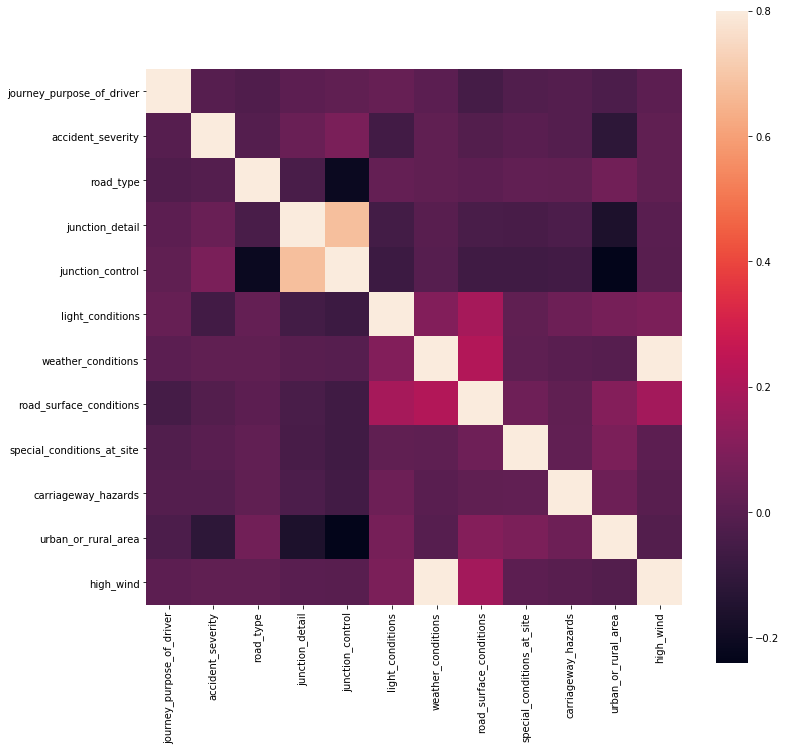

In [7]:
# Create heatmap to find correlation between different properties
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [8]:
# Drop all rows whith unknown values (This step could have been done earlier)
df = df[df['junction_control'] != -1]
print(df.shape)
df.head()

(172464, 12)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,high_wind
0,5,3,2,2,3,1,1,1,0,0,1,1
1,5,3,3,2,2,1,1,1,0,0,1,1
2,5,3,3,2,2,1,1,1,0,0,1,1
4,5,3,2,2,3,1,1,1,0,0,1,1
5,5,3,2,2,3,1,1,1,0,0,1,1


In [9]:
df['journey_purpose_of_driver'].unique()

array([ 5,  1,  3,  2,  4, -1], dtype=int64)

In [10]:
df = df[df['journey_purpose_of_driver'] != -1]
print(df.shape)

(172456, 12)


In [11]:
df['road_surface_conditions'].unique()

array([ 1,  2,  3,  4,  5, -1], dtype=int64)

In [12]:
df = df[df['road_surface_conditions'] != -1]
print(df.shape)

(172173, 12)


In [13]:
df['carriageway_hazards'].unique()


array([ 0,  3,  2,  7,  6,  1, -1], dtype=int64)

In [14]:
df = df[df['carriageway_hazards'] != -1]
print(df.shape)

(172127, 12)


In [15]:
# Split data into independent variables (X) and dependant variables (y)
X = df.loc[:, df.columns != 'accident_severity']
Y = df.accident_severity.values
print(Y)
X.head()

[3 3 3 ... 3 3 3]


,journey_purpose_of_driver,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,high_wind
0,5,2,2,3,1,1,1,0,0,1,1
1,5,3,2,2,1,1,1,0,0,1,1
2,5,3,2,2,1,1,1,0,0,1,1
4,5,2,2,3,1,1,1,0,0,1,1
5,5,2,2,3,1,1,1,0,0,1,1


In [16]:
# As all of the variables chosen are categorical, we can proceed to train the machine learning model
# 1. import all the relavent libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Split data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(137701, 11) (137701,)
(34426, 11) (34426,)


In [17]:
# Apply machine learning models
#svc
svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVC = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test)*100, 2)
acc_svc

#K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test)*100, 2)
acc_knn

#logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_predLR = lr.predict(X_test)
acc_LR = round(lr.score(X_train, Y_train)*100, 2)
acc_LR



print(acc_svc)
print(acc_knn)
print(acc_LR)

87.16
85.57
87.21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
# decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
Y_predDEC = dec_tree.predict(X_test)
acc_DEC = round(dec_tree.score(X_test, Y_test)*100, 2)
acc_DEC

87.01

In [19]:
#linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_predSVC = linear_svc.predict(X_test)
acc_linSVC = round(linear_svc.score(X_test, Y_test)*100, 2)
acc_linSVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


87.16

In [20]:
fin_acc = pd.DataFrame({'Model': ['Support Vector Machine', 'Linear Support Vector Machine', 'K Nearest Neighbors', 'Decision Tree', 'Logistic Regression'], 
                       'Accuracy': [acc_svc, acc_linSVC, acc_knn, acc_DEC, acc_LR]})
fin_acc

,Model,Accuracy
0,Support Vector Machine,87.16
1,Linear Support Vector Machine,87.16
2,K Nearest Neighbors,85.57
3,Decision Tree,87.01
4,Logistic Regression,87.21
